In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('insurance2.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

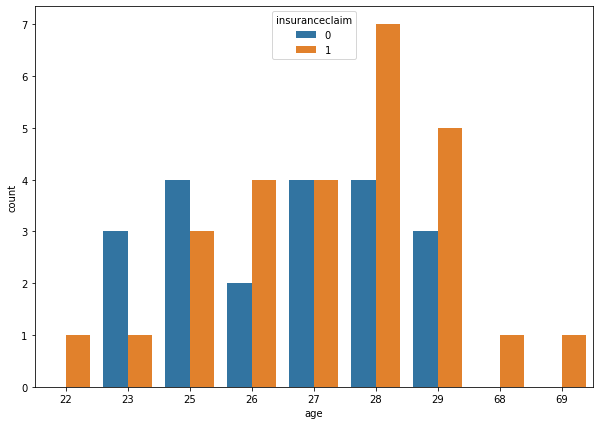

In [7]:
plt.figure(figsize=(10,7))
sns.countplot(df.age.value_counts(), hue=df.insuranceclaim)

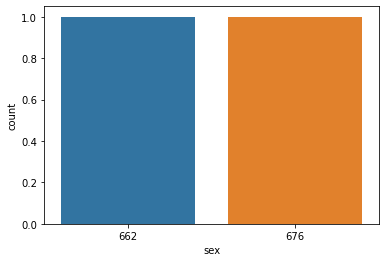

1    676
0    662
Name: sex, dtype: int64


In [8]:
sns.countplot(df.sex.value_counts())
plt.show()
print(df.sex.value_counts())

In [9]:
df.insuranceclaim.value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [10]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [11]:
df.region.unique()

array([3, 2, 1, 0], dtype=int64)

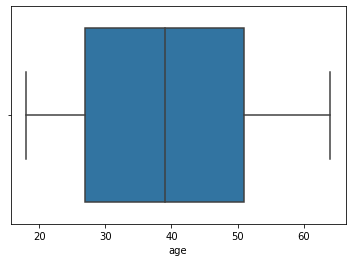

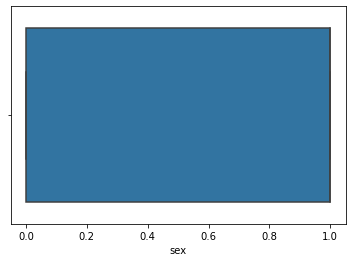

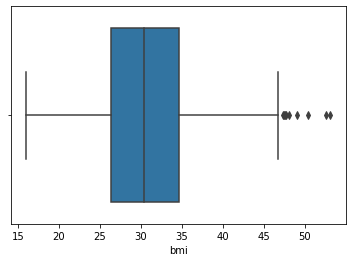

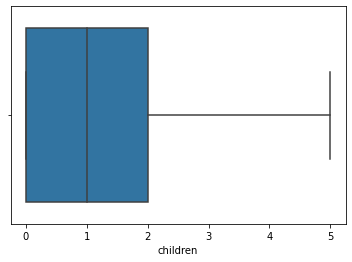

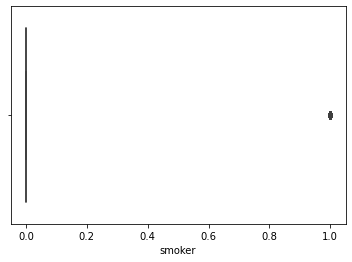

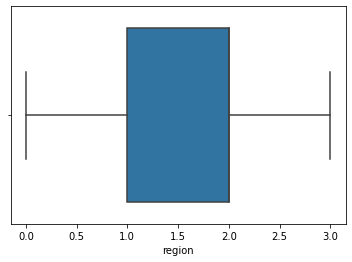

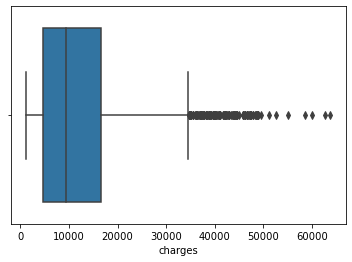

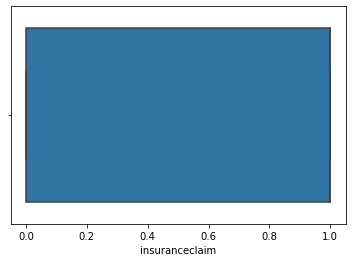

In [12]:
for column in df:
    plt.figure()
    sns.boxplot(df[column])

In [13]:
df[df['bmi']>40]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
14,27,1,42.13,0,1,2,39611.7577,1
18,56,1,40.30,0,0,3,10602.3850,1
83,48,0,41.23,4,0,1,11033.6617,0
116,58,1,49.06,0,0,2,11381.3254,1
170,63,1,41.47,0,0,2,13405.3903,1
...,...,...,...,...,...,...,...,...
1240,52,1,41.80,2,1,2,47269.8540,1
1312,34,1,42.90,1,0,3,4536.2590,1
1317,18,1,53.13,0,0,2,1163.4627,1
1323,42,0,40.37,2,1,2,43896.3763,1


In [14]:
df.children.value_counts().to_frame()

,children
0,574
1,324
2,240
3,157
4,25
5,18


In [15]:
child = df.groupby('children')['insuranceclaim'].sum()
child.to_frame()

,insuranceclaim
children,
0,463
1,173
2,94
3,45
4,4
5,4


<AxesSubplot:xlabel='children', ylabel='count'>

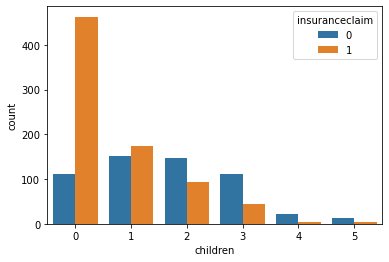

In [16]:
sns.countplot(df.children, hue=df.insuranceclaim)

In [17]:
smoker = df.groupby('smoker')['insuranceclaim'].sum()
smoker.to_frame()

,insuranceclaim
smoker,
0,534
1,249


0    1064
1     274
Name: smoker, dtype: int64


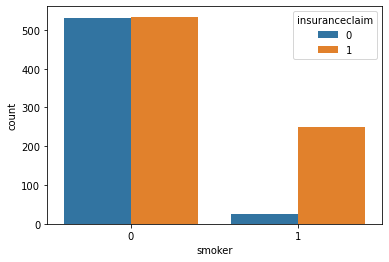

In [18]:
sns.countplot(df.smoker, hue=df.insuranceclaim)
print(df.smoker.value_counts())

In [19]:
df.region.unique()

array([3, 2, 1, 0], dtype=int64)

In [20]:
print(df.region.value_counts())

2    364
1    325
3    325
0    324
Name: region, dtype: int64


In [21]:
reg = df.groupby('region')['insuranceclaim'].sum()
reg.to_frame()

,insuranceclaim
region,
0,192
1,163
2,245
3,183


In [22]:
x = df.drop('insuranceclaim', axis=1)
y = df['insuranceclaim']

In [23]:
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=12345, test_size=0.2)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 7)
(268, 7)
(1070,)
(268,)


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.svm import SVC

In [30]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
pred = gb_clf.predict(X_test)
print('Accuracy Score: ', accuracy_score(pred, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('Classification report: \n', classification_report(pred, y_test))

Accuracy Score:  0.9701492537313433
Confusion Matrix: 
 [[102   3]
 [  5 158]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.97      0.98      0.98       161

    accuracy                           0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268



In [31]:
# import pickle

# file = open('model.pkl','wb')
# pickle.dump(gb_clf, file)

In [43]:
pred = int(gb_clf.predict([[19,1,27.900,2,3,3,11111]]))
print(pred)
# print(int(pred))

0


lor = LogisticRegression()
lor.fit(X_train,y_train)
pred = lor.predict(X_test)
print('Accuracy Score: ', accuracy_score(pred, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('Classification report: \n', classification_report(pred, y_test))

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print('Accuracy Score: ', accuracy_score(pred, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('Classification report: \n', classification_report(pred, y_test))

naive = GaussianNB()
naive.fit(X_train,y_train)
pred = naive.predict(X_test)
print('Accuracy Score: ', accuracy_score(pred, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('Classification report: \n', classification_report(pred, y_test))

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
print('Accuracy Score: ', accuracy_score(pred, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('Classification report: \n', classification_report(pred, y_test))

svc = SVC()
svc.fit(X_train,y_train)
pred = svc.predict(X_test)
print('Accuracy Score: ', accuracy_score(pred, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('Classification report: \n', classification_report(pred, y_test))

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
pred = ada.predict(X_test)
print('Accuracy Score: ', accuracy_score(pred, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('Classification report: \n', classification_report(pred, y_test))